### 1. Given the function $ f(x) = -x^{4} + 2x^{3} + 2x^{2} - x $ and it's derivative $f'(x) = {- 4 x^3 + 6 x^2 + 4 x - 1}$

In [7]:
# Standard import and functions
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -np.power(x, 4) + 2 * np.power(x, 3) + 2 * np.power(x, 2) - x

def df(x):
    return -4 * np.power(x, 3) + 6 * np.power(x, 2) + 4 * x - 1

#### a. Plot the function, and its gradient (derivative) from $x = -2$ to $x = 3$

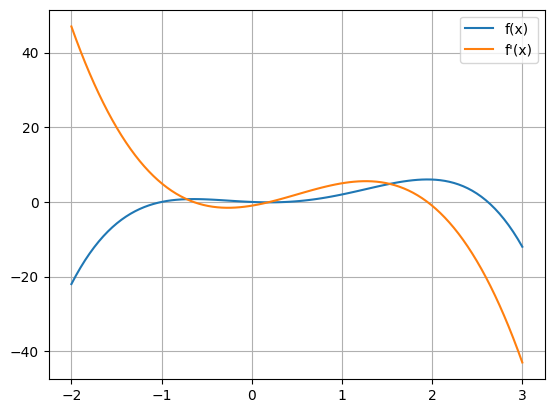

In [8]:
# Code and plot

x = np.linspace(-2, 3, 100)
plt.plot(x, f(x), label="f(x)")
plt.plot(x, df(x), label="f'(x)")
plt.grid()
plt.legend()
plt.show()

#### b. Maximize using gradient ascent. You can try step size 0.1 and start somewhere in the range $[-2, 3]$. 

Gradient ascent: $x_{(k+1)} = x_{(k)} + \gamma \nabla f(x_{(k)})$

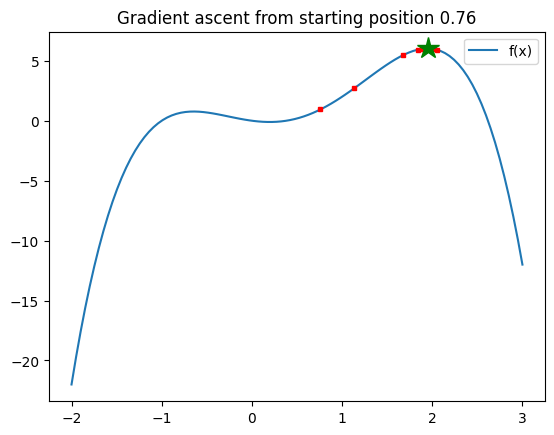

In [4]:
# Code
def gradient_ascent(x, precision=0.0001, gamma=0.1):
    dx = gamma * df(x)
    while np.abs(dx) > precision:
        plt.plot(x, f(x), color="red", marker="s", markersize=3)
        x = x + dx
        dx = gamma * df(x)
    return x, f(x)

def plot_gradient_ascent(start, stop, steps):
    x = np.linspace(start, stop, steps)
    
    plt.plot(x, f(x), label="f(x)")
    randx = np.random.uniform(start, stop)
    end_x, end_y = gradient_ascent(randx)
    plt.plot(end_x, end_y, color="green", marker="*", markersize=16)
    plt.legend()
    plt.title(f"Gradient ascent from starting position {np.around(randx, 2)}")
    plt.show()
    
plot_gradient_ascent(-2, 3, 100)

##### How does the choice of starting point and step size affect the algorithm's performance?

##### Is there a starting point where the algorithm would not even be able to find a local maximum?

Explain:
Both starting position and step size affects the algorithms performance.
- With a starting point to the left it will converge on the left maximum, depending on the step size. 
- With the starting point in the center, it might stop if the gradient is zero.
- With the starting point to the right, it will converge on the right maximum.
- With a too low step size, it will converge slowly (poor performance).
- With a too high step size, it might overshoot, and not converge.

There are some points if the starting point is to the left. Example:
![Bad_Starting_Point](bad_start_gradient_ascent.png)

#### c. Assume that we are only interested in maxima of $f(x)$, where $-2 \leq x \leq 3$, and x increases in step length of 0.5 ($\Delta x = 0.5$). Perform an exhaustive search to maximize $f(x)$ and plot the result

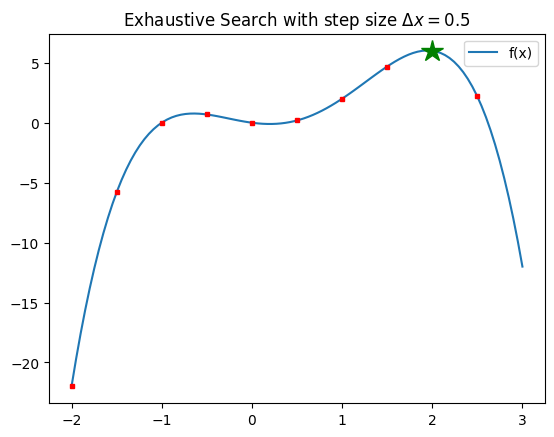

In [6]:
# Code and plot
def exhaustive_search(start, stop, step=0.5):
    x = start
    best = (x, f(x))
    while x < stop:
        y = f(x)
        if y > best[1]:
            best = (x, y)
        plt.plot(x, y, color="red", marker="s", markersize=3)
        x += step
    return best

def plot_exhaustive_search(start, stop, steps):
    x = np.linspace(start, stop, steps)
    step_size = 0.5
    
    plt.plot(x, f(x), label="f(x)")
    best_x, best_y = exhaustive_search(start, stop, step=step_size)
    plt.plot(best_x, best_y, color="green", marker="*", markersize=16)
    plt.legend()
    plt.title(f"Exhaustive Search with step size $\Delta x = {step_size}$")
    plt.show()
    
plot_exhaustive_search(-2, 3, 100)

#### d. Gradient ascent and hill climbing are quite similar, and they are based almost exclusively on exploitation. Can you think of any additions to these algorithms in order to do more exploration?

Explain:

Run the algorithm several times with random starting positions, this will explore the solution space and find several local optima. Another option is to add more random movement into the algorithm for more exploration. This could be done after a solution is found, or at a probability while searching.

#### e. Which algorithm do you think is the most efficient at maximizing $f(x)$ under the conditions in Problem **c**; exhaustive search or simulated annealing?

Explain:

In this case the exhaustive search would be better at maximizing $f(x)$. It takes a few iterations to go through a one dimensional solution space. For problems with higher dimensions or more complex functions with smaller steps size exhaustive search becomes impractical and simulated annealing will outperform.